<hr/>

# Predicting House Prices (Keras - Artificial Neural Network)
<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Exploratory Data Analysis](#ch3)
1. [Working with Feature Data](#ch4)
1. [Feature Engineering](#ch5)
1. [Scaling and Train Test Split](#ch6)
1. [Creating a Model](#ch7)
1. [Training the Model](#ch8)
1. [Evaluation on Test Data](#ch9)
1. [Predicting on a Brand New House](#ch10)

<a id="ch1"></a>
## Overview 
<hr/>

Salah satu tujuan notebook ini adalah untuk **menunjukkan langkah demi langkah cara menganalisis dan memvisualisasikan kumpulan data untuk memprediksi harga rumah di masa mendatang.** Selain itu, saya akan menjelaskan sebagian besar konsep yang digunakan agar kita memahami mengapa suatu model atau metrik tersebut digunakan.
Berdasarkan fitur-fitur seperti sqft_living, kamar mandi, kamar tidur, pemandangan, dan lainnya, kami akan membangun model pembelajaran mendalam yang dapat memprediksi harga rumah di masa mendatang. 

Jika Anda memiliki pertanyaan atau umpan balik, jangan ragu untuk menulis dan jika Anda menyukai kernel ini,<b><font color='green'> mohon upvote! </font></b>

<img src="https://images.wsj.net/im-233504?width=860&size=1.5&pixel_ratio=1.5" title="source: www.pexels.com" />
<br>

Pertanyaan-pertanyaan berikut akan dijawab di seluruh Kernel:
* ***Fitur apa saja yang tersedia dalam kumpulan data?***
* ***Fitur mana yang kategorik?***
* ***Fitur mana yang numerik?***
* ***Fitur mana yang berisi nilai nol, atau kosong?***
* ***Apa saja tipe data untuk berbagai fitur?***
* ***Bagaimana distribusi nilai fitur numerik di seluruh sampel?***
* ***Fitur mana yang lebih berkorelasi dengan harga?***

<a id="ch2"></a>
## Dataset
<hr/>

* Dataset ini berisi harga jual rumah untuk King County, yang mencakup Seattle.
* Ini termasuk rumah yang dijual antara Mei 2014 dan Mei 2015.
* 21 kolom. (fitur)
* 21597 baris.
***Feature Columns***
    
* **id:** ID unik untuk setiap rumah yang terjual
* **date:** Tanggal penjualan rumah
* **price:** Harga setiap rumah terjual
* **bedrooms:** Jumlah kamar tidur
* **bathrooms:** Jumlah kamar mandi, di mana .5 merupakan kamar dengan toilet tetapi tanpa pancuran
* **sqft_living:** Ukuran persegi ruang tamu interior apartemen
* **sqft_lot:** Ukuran persegi luas tanah
* **floors:** Jumlah lantai
* **waterfront:** - Variabel dummy apakah apartemen menghadap ke tepi laut atau tidak
* **view:** Indeks dari 0 hingga 4 tentang seberapa bagus tampilan properti itu
* **condition:** - Indeks dari 1 hingga 5 pada kondisi apartemen,
* **grade:** Indeks dari 1 hingga 13, di mana 1-3 tidak sesuai dengan konstruksi dan desain bangunan, 7 memiliki tingkat konstruksi dan desain rata-rata, dan 11-13 memiliki tingkat kualitas konstruksi dan desain yang tinggi.
* **sqft_above:** Rekaman persegi ruang interior perumahan yang berada di atas permukaan tanah
* **sqft_basement:** Rekaman persegi ruang interior perumahan yang berada di bawah permukaan tanah
* **yr_built:** Tahun rumah pertama kali dibangun
* **yr_renovated:** Tahun renovasi terakhir rumah
* **zipcode:** Kode pos di area mana rumah itu berada
* **lat:** Lintang (latitudinal)
* **long:** Bujur (longitudinal)
* **sqft_living15:** Rekaman persegi ruang hidup perumahan interior untuk 15 tetangga terdekat
* **sqft_lot15:** Luas tanah kavling 15 tetangga terdekat

## Import Library

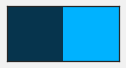

In [34]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
#Import ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots 
colors = ['#06344d','#00b2ff']
sns.set(palette=colors, font='Serif', style='white', rc={'axes.facecolor':'#f1f1f1', 'figure.facecolor':'#f1f1f1'})
sns.palplot(colors)

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

import warnings 
warnings.filterwarnings('ignore')

R-Square meningkat ketika jumlah fitur bertambah. karena ini terkadang evaluator yang lebih kuat lebih disukai untuk membandingkan kinerja antara model yang berbeda. evaluasi ini disebut Adjusted R-Square dan biasanya meningkat, jika penambahan variabel mengurangi MSE.

In [35]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [36]:
df = pd.read_csv('kc_house_data.csv')
df_dm=df.copy()

In [37]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Analyze by describing data


***Fitur apa saja yang tersedia dalam kumpulan data?***

In [38]:
print(df.columns.values)

['id' 'date' 'price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot'
 'floors' 'waterfront' 'view' 'condition' 'grade' 'sqft_above'
 'sqft_basement' 'yr_built' 'yr_renovated' 'zipcode' 'lat' 'long'
 'sqft_living15' 'sqft_lot15']


***Fitur mana yang kategorik?***

Nilai-nilai ini mengklasifikasikan sampel ke dalam kumpulan sampel yang serupa. Dalam fitur kategoris apakah nilai-nilai nominal, ordinal, rasio, atau interval berbasis? Antara lain ini membantu kita memilih plot yang sesuai untuk visualisasi.

* Categorical: id, waterfront, zipcode.

***Fitur mana yang numerik?***

Fitur mana yang numerik? Nilai-nilai ini berubah dari sampel ke sampel. Di dalam fitur numerik, apakah nilainya diskrit, kontinu, atau deret waktu? Antara lain ini membantu kita memilih plot yang sesuai untuk visualisasi.

* Continous: price, bathrooms, floors, lat, long.
* Discrete: date, bedrooms, sqft_living, sqft_lot, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, sqft_living15, sqft_lot15.

In [39]:
df.loc[0]

id                    7129300520
date             20141013T000000
price                     221900
bedrooms                       3
bathrooms                      1
sqft_living                 1180
sqft_lot                    5650
floors                         1
waterfront                     0
view                           0
condition                      3
grade                          7
sqft_above                  1180
sqft_basement                  0
yr_built                    1955
yr_renovated                   0
zipcode                    98178
lat                      47.5112
long                    -122.257
sqft_living15               1340
sqft_lot15                  5650
Name: 0, dtype: object

In [40]:
df.shape

(21613, 21)

***Fitur mana yang berisi nilai nol, atau kosong?***

In [41]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

***Apa saja tipe data untuk berbagai fitur?***

Five features are floats, fifteen are integers and one is an object.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Pearson correlation matrix
Kami menggunakan correlation coefficient Pearson untuk menguji kekuatan dan arah hubungan linier antara dua variabel kontinu.

Koefisien korelasi dapat berkisar dalam nilai dari -1 hingga +1. Semakin besar nilai absolut koefisien, semakin kuat hubungan antar variabel. Untuk korelasi Pearson, nilai absolut 1 menunjukkan hubungan linier yang sempurna. Korelasi yang mendekati 0 menunjukkan tidak adanya hubungan linier antar variabel.

Tanda koefisien menunjukkan arah hubungan. Jika kedua variabel cenderung naik atau turun bersama-sama, koefisiennya positif, dan garis yang mewakili korelasi miring ke atas. Jika satu variabel cenderung meningkat ketika yang lain menurun, koefisiennya negatif, dan garis yang mewakili korelasi miring ke bawah.

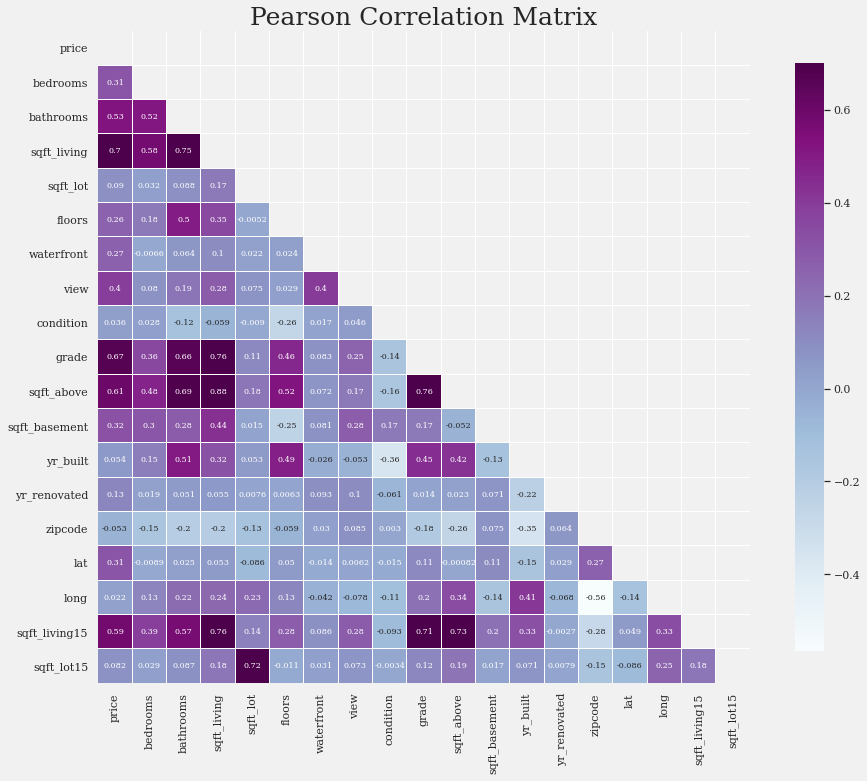

In [43]:
feature = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view','condition','grade',
          'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat','long', 'sqft_living15', 'sqft_lot15' ]

mask = np.zeros_like(df[feature].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix', fontsize=25)

sns.heatmap(df[feature].corr(), linewidth=0.25, vmax=0.7, square=True, cmap='BuPu', 
           linecolor='w', annot=True, annot_kws={'size': 8}, mask=mask, cbar_kws={'shrink': .9});

In [44]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

[Text(0.5, 1.0, 'Number of different houses depending on bedrooms')]

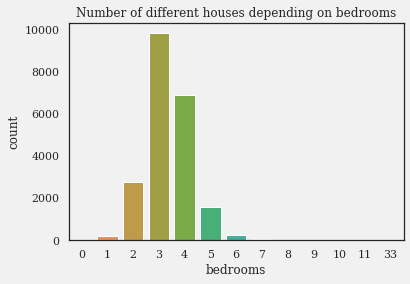

In [45]:
plt.figure(figsize=(6,4))

sns.countplot(data=df, x='bedrooms').set(title='Number of different houses depending on bedrooms')

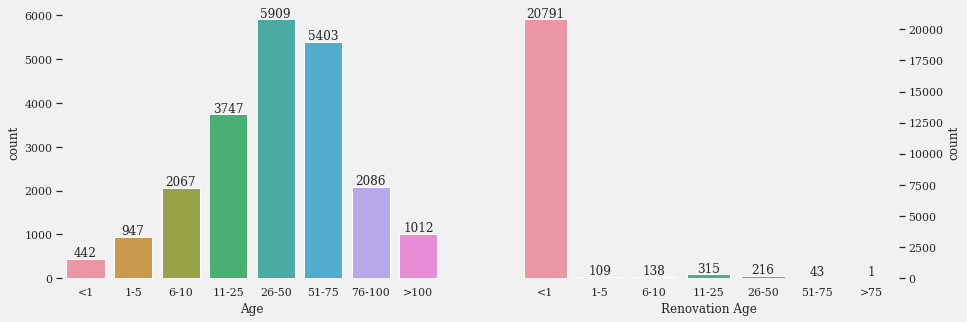

In [46]:
# just take the year from the date column
df_dm['sales_yr']=df_dm['date'].astype(str).str[:4]

#add the age of the building when the house were sold as new column
df_dm['age']=df_dm['sales_yr'].astype(int)-df_dm['yr_built']
#add the age of the renovation when the houses were sold as new column
df_dm['age_rnv']=0
df_dm['age_rnv']=df_dm['sales_yr'][df_dm['yr_renovated']!=0].astype(int)-df_dm['yr_renovated'][df_dm['yr_renovated']!=0]
df_dm['age_rnv'][df_dm['age_rnv'].isnull()]=0

#pertition teh age innto bins
bins = [-2,0,5,10,25,50,75,100,100000]
labels = ['<1', '1-5', '6-10', '11-25', '26-50', '51-75', '76-100', '>100']
df_dm['age_binned']=pd.cut(df_dm['age'], bins=bins, labels=labels)

#paprtition the age rnv into rnv into bins
bins = [-2,0,5,10,25,50,75,100000]
labels = ['<1', '1-5', '6-10', '11-25', '26-50', '51-75', '>75']
df_dm['age_rnv_binned']= pd.cut(df_dm['age_rnv'], bins=bins, labels=labels)

# histogram for the binned columns
f, axes = plt.subplots(1,2,figsize=(15,5))
p1=sns.countplot(df_dm['age_binned'],ax=axes[0])
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2,height + 50, height,ha='center')
p2=sns.countplot(df_dm['age_rnv_binned'],ax=axes[1])
sns.despine(left=True, bottom=True)
for p in p2.patches:
    height = p.get_height()
    p2.text(p.get_x()+p.get_width()/2,height + 200, height,ha='center')

axes[0].set(xlabel='Age')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position('right')
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Renovation Age');
    
#transform the factor values to be able to use in model
df_dm = pd.get_dummies(df_dm, columns=['age_binned','age_rnv_binned'])

### Price correlation
* Ini memungkinkan kami untuk menjelajahi label yang sangat berkorelasi dengan harga.
* sqft_living tampak seperti label yang sangat berkorelasi dengan harga, serta kelas, sqft_above, sqft_living15, dan kamar mandi.

***Fitur mana yang lebih berkorelasi dengan harga?***

In [47]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### Fitur harga
* Sebagian besar harga rumah antara \\$0 dan \\$1.500.000.
* Harga rumah rata-rata adalah \\$540.000.
* Ingatlah bahwa mungkin ide yang baik untuk menghilangkan nilai-nilai ekstrim. Misalnya, kita bisa fokus pada rumah dari \\$0 sampai \\$3.000.000 dan membuang yang lainnya.
* Tampaknya ada hubungan linier positif antara harga dan sqft_living.
* Peningkatan ruang hidup umumnya sesuai dengan kenaikan harga rumah.

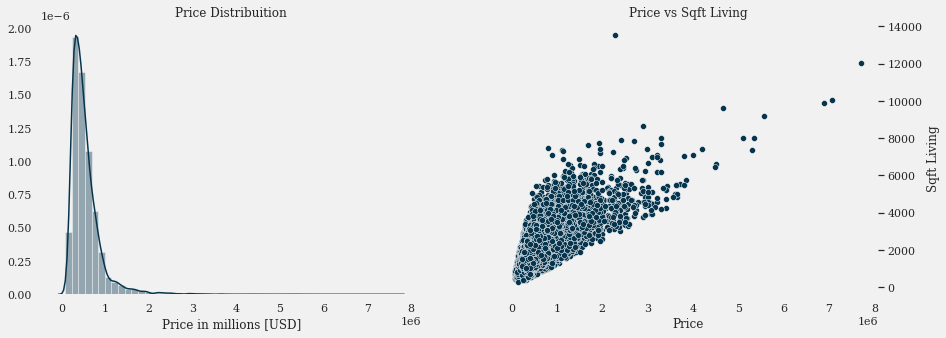

In [48]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

### Bedrooms and floors box plots
box plots adalah metode untuk menggambarkan kelompok data numerik secara grafis melalui kuartilnya. box plots mungkin juga memiliki garis memanjang dari boxes (whiskers) yang menunjukkan variabilitas di luar kuartil atas dan bawah, oleh karena itu disebut plot boxes-dan-whiskers. outlier yang terdapat diplot sebagai titik individu. Jarak antara bagian-bagian kotak yang berbeda menunjukkan tingkat dispersi (penyebaran).

* Kita bisa melihat outlier diplot sebagai poin individu; ini mungkin adalah rumah yang lebih mahal.
* Kita dapat melihat bahwa harga cenderung naik ketika rumah memiliki lebih banyak kamar tidur. 

[Text(0.5, 0, 'Floors'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Floors vs Price Box Plot')]

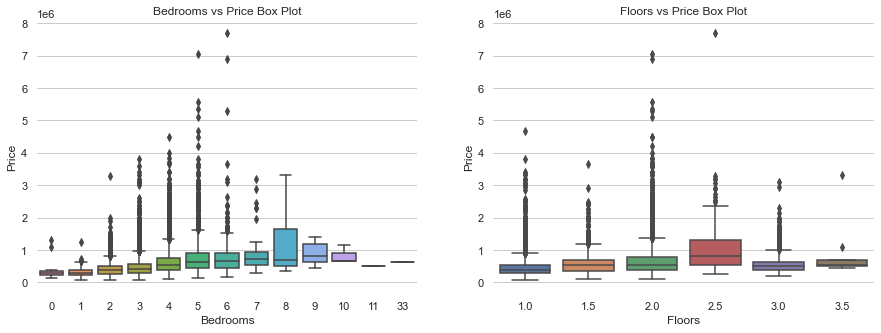

In [49]:
sns.set(style="whitegrid", font_scale=1)
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price', title='Bedrooms vs Price Box Plot')
axes[1].set(xlabel='Floors', ylabel='Price', title='Floors vs Price Box Plot')

### Waterfront, view and grade box plots
* Rumah yg berada tepi laut (watefront) cenderung memiliki nilai harga yang lebih baik.
* Harga rumah waterfront cenderung lebih menyebar dan harga rumah tanpa waterfront cenderung lebih terkonsentrasi.
* Grade dan watefront mempengaruhi harga. View tampaknya tidak terlalu berpengaruh tetapi juga berpengaruh pada harga.

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

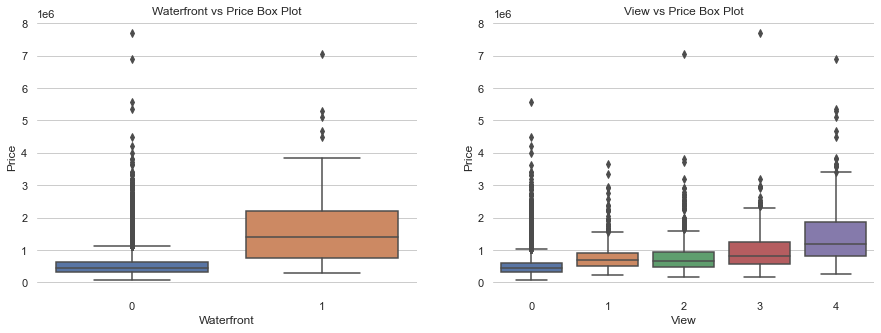

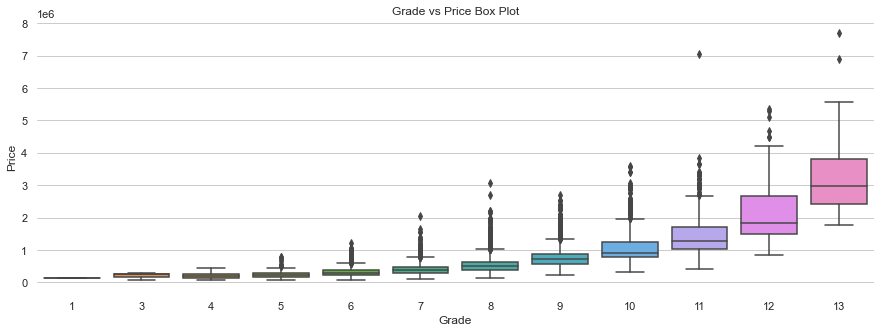

In [50]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

<a id="ch4"></a>
## Working with Feature Data
<hr/>

### Correcting by dropping features
Dengan menghapus beberapa faetur, mempermudah kita berurusan dengan lebih sedikit titik data. Mempercepat notebook dan memudahkan analisis. Berdasarkan asumsi kita putuskan untuk menghapus fitur Id, kode pos, dan Tanggal.

In [51]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)

<a id="ch5"></a>
## Feature engineering
<hr/>

Kami ingin merekayasa fitur tanggal untuk membuat kolom tahun dan bulan. Tanggal fitur adalah sebagai string. Dengan pd.to_datetime kita dapat mengonversi argumen menjadi datetime.

In [52]:
df['date'] = pd.to_datetime(df['date'])

df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


### House price trends
* Melihat boxplot, kami melihat bahwa tidak ada perbedaan besar antara tahun 2014 dan 2015.
* Jumlah rumah yang terjual per bulan cenderung sama setiap bulannya.
* Lineplot  menunjukkan bahwa sekitar bulan April terjadi kenaikan harga rumah.

[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

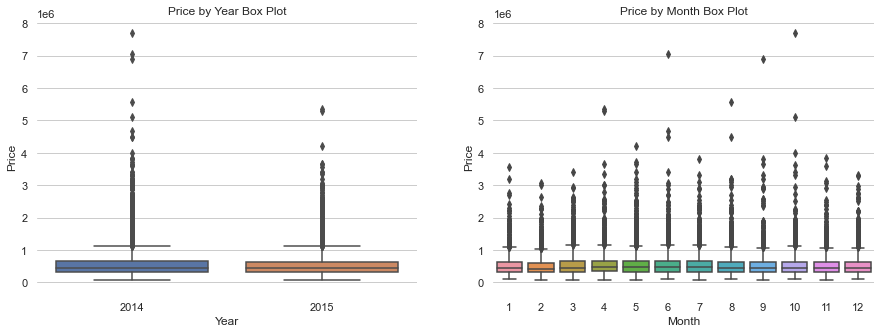

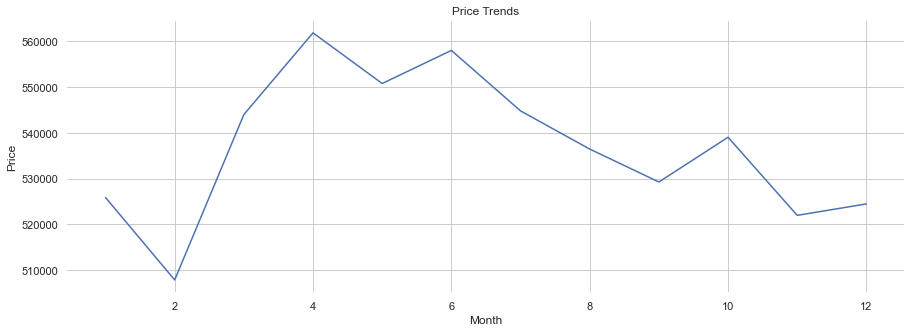

In [53]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

<AxesSubplot:xlabel='yr_built', ylabel='price'>

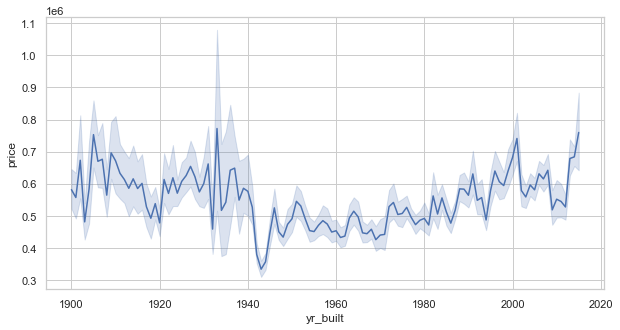

In [54]:
plt.figure(figsize=(10,5))
sns.lineplot(x='yr_built', y='price', data=df)

<a id="ch6"></a>
## Scaling and train test split
<hr/>
Sekarang kita siap untuk melatih model dan memprediksi solusi yang diperlukan. Ada 60+ algoritma pemodelan prediktif untuk dipilih. Kita harus memahami jenis masalah dan kebutuhan solusi untuk mempersempit ke beberapa model terpilih yang dapat kita evaluasi. Masalah kita adalah masalah regresi kesalahan kuadrat rata-rata. Kami juga melakukan kategori pembelajaran mesin yang disebut pembelajaran terawasi karena kami melatih model kami dengan kumpulan data yang diberikan.

In [55]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [56]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 19)
(6484, 19)
(15129,)
(6484,)


### Normalizing / scaling the data
Kita perlu scaling data fitur. Untuk mencegah terjadinya data leakage dari test set, kita hanya memasang scaler ke training set.

In [60]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())

Max:  1.0000000000000002
Min:  0.0


<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. Ex: X_train.shape (15117, 19). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [61]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

<a id="ch8"></a>
## Training the model
***
Now that the model is ready, we can fit the model into the data.

Since the dataset is large, we are going to use batch_size. It is typical to use batches of the power of 2 (32, 64, 128, 256...). In this case we are using 128. The smaller the batch size, the longer is going to take.

In [62]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 423629291520.0000 - val_loss: 433029578752.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 422788923392.0000 - val_loss: 430007812096.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 410921828352.0000 - val_loss: 402430459904.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 351825035264.0000 - val_loss: 302332674048.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 219432452096.0000 - val_loss: 154589675520.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 115224256512.0000 - val_loss: 105549717504.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 98491351040.0000 - val_loss: 102722781184.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 96900415488.0000 - val_loss: 101239603200.0000
Epoch 9/400
119/11

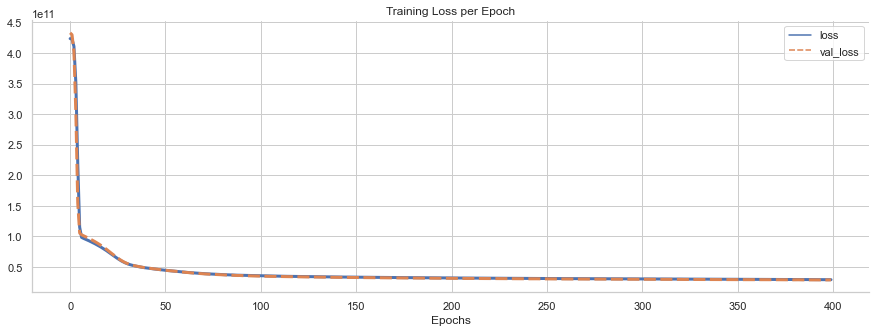

In [63]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### Predicting on brand new data
Pada bagian ini, kami memberikan model pada tes set untuk mendapatkan daftar prediksi. Kemudian kami membandingkan nilai yang benar dengan daftar prediksi. Kami menggunakan metrik yang berbeda untuk membandingkan prediksi, dalam hal ini, kami menggunakan MAE, MSE, RMSE, dan Skor Regresi Varians.

Mari kita mulai dengan menganalisis MAE, yaitu \\$103.500. Ini berarti bahwa model kita tidak bekerja di rata-rata sekitar \\$100.000.

***Apakah MAE itu baik atau buruk?***

Untuk itu, kita harus memperhitungkan kumpulan data asli kita dan melihat nilai seperti apa yang kita miliki. Misalnya, rata-rata adalah 540.000, oleh karena itu MEA adalah sekitar 19% dari harga rata-rata. Ini bukan hasil yang sangat baik.

Untuk lebih memahami kesalahan ini, kita dapat menggunakan skor regresi varians, di mana kemungkinan skor terbaik adalah 1,0 dan nilai yang lebih rendah lebih buruk. Ini memberi tahu Anda berapa banyak varians yang dijelaskan oleh model Anda. Dalam kasus kami, kami memiliki 0,80 yang merupakan hasil normal.

In [64]:
# predictions on the test set
predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Variance Regression Score: ',explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())

MAE:  107390.00930776719
MSE:  29077956781.6184
RMSE:  170522.59903490328
Variance Regression Score:  0.7942163577799878


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


### Model predictions vs perfect fit
* Kita dapat membandingkan Model predictions vs perfect fit untuk melihat seberapa akurat model tersebut.
* Garis merah mewakili perfect fit.
* Kita dipengaruhi oleh outlier, yang merupakan rumah mahal. Model kita tidak mampu memprediksi rumah mewah.
* Di sisi lain, model kami pandai memprediksi harga rumah antara o dan \\$2 juta. Jelas ada yang cocok.
* Mungkin layak untuk melatih kembali model kami hanya dengan harga rumah di bawah \\$3 juta.

[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

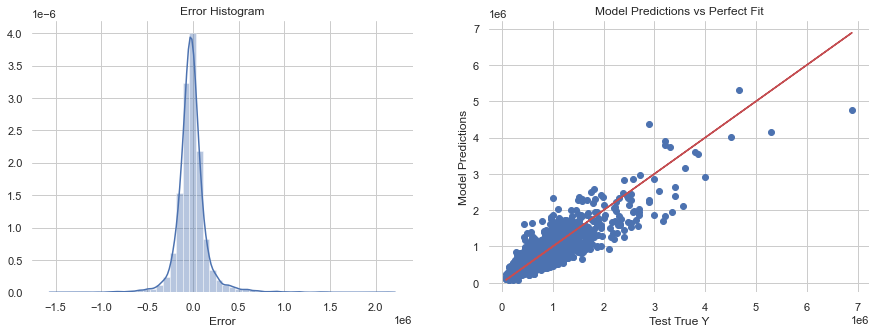

In [66]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

errors = y_test.values.reshape(6484, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

<a id="ch10"></a>
## Memprediksi rumah baru
---
Kita akan menggunakan model untuk memprediksi harga rumah baru. Kita akan memilih rumah pertama dari kumpulan data dan mendrop harganya. single_house akan memiliki semua fitur yang kita butuhkan untuk memprediksi harga. Setelah itu, kita perlu membentuk kembali variabel dan menskalakan fitur.

Harga aslinya adalah \\$221.900 dan prediksi modelnya adalah \\$293842.47

In [67]:
# fueatures of new house
single_house = df.drop('price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 19))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',df.iloc[0]['price'])

Features of new house:
bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
month              10.0000
year             2014.0000
Name: 0, dtype: float64

Prediction Price: 293842.47

Original Price: 221900.0


**Terima kasih** telah meluangkan waktu untuk membaca eksplorasi pertama saya tentang kumpulan data Kaggle. Saya berharap untuk melakukan lebih banyak!

Jika Anda memiliki pertanyaan atau feedback, jangan ragu untuk berkomentar dan jika Anda menyukai kernel ini,<b><font color='green'> mohon upvote! </font></b>